**<h1>Indian Startup Data Analysis**


In [54]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score, RepeatedKFold
from numpy import mean,std, absolute
import numpy as np

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indian-startup-funding/startup_funding.csv


**<h3> Dataset**

In [2]:
data = pd.read_csv("../input/indian-startup-funding/startup_funding.csv",encoding='utf-8')

**<h3> sample data**

In [3]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
print("dataset has row and  columns :" , data.shape)

dataset has row and  columns : (3044, 10)


<h2> Dataset Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


<h3> Missing value in the dataset

In [6]:
data.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

<h4> We don't need Date column , so delete this column

In [7]:
data.drop(['Date dd/mm/yyyy'], axis=1,inplace=True)

In [8]:
missing_values = data.isnull().sum()
missing_value_frame = missing_values.to_frame()

missing_value_frame.columns=['count']
missing_value_frame.index.names = ['Name']
missing_value_frame['Name'] = missing_value_frame.index

In [9]:
missing_value_frame.head()

,count,Name
Name,,
Sr No,0,Sr No
Startup Name,0,Startup Name
Industry Vertical,171,Industry Vertical
SubVertical,936,SubVertical
City Location,180,City Location


<h3> Graphical view of missing value

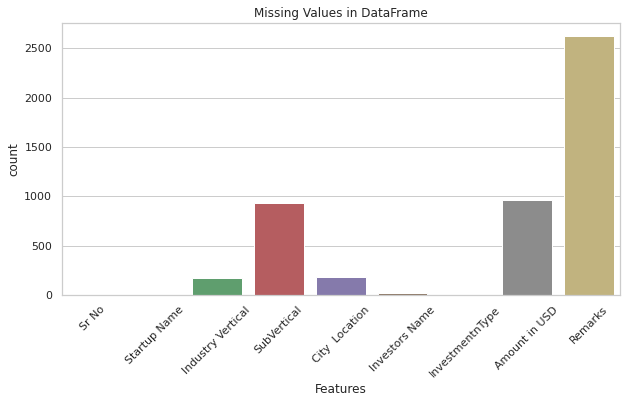

In [10]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid", color_codes = True)
sns.barplot(x='Name', y='count', data=missing_value_frame);
plt.title("Missing Values in DataFrame")
plt.xlabel("Features")
plt.xticks(rotation=45);

<h4> Filling missing value in "investmentType " column by forward fill method(ffill)

In [11]:
data['InvestmentnType'].fillna(method='ffill',inplace=True)

<h4> Investers Name

In [12]:
data['Investors Name'].unique()

array(['Tiger Global Management', 'Susquehanna Growth Equity',
       'Sequoia Capital India', ..., 'KARSEMVEN Fund',
       'Exfinity Fund, GrowX Ventures.',
       'UK based Group of Angel Investors'], dtype=object)

<h5>Filling 'Investors Name'

In [13]:
data['Investors Name'] = data['Investors Name'].fillna("Unknown")

<h5> Filling " Industry Vertical " Value 

In [14]:
data['Industry Vertical'] = data['Industry Vertical'].fillna(method='ffill')

<h4> Filling " SubVertical " Value with mode of Subvertical column

In [15]:
data['SubVertical'] = data['SubVertical'].fillna(data['SubVertical'].mode()[0])

<h4> Filling "City Location " Value

In [16]:
data['City  Location'] = data['City  Location'].fillna(data['City  Location'].mode()[0])

<h3> Removing those rows whose column value are: "undisclosed, Undisclosed, unknown"

In [17]:
# drop rows with non numerical funding amount 
data.drop(data.loc[(data['Amount in USD']=='undisclosed') | (data['Amount in USD']=='Undisclosed') | 
                   (data['Amount in USD'].isnull()) | (data['Amount in USD']=='unknown')].index,inplace=True)

Remaing Rows are:

In [19]:
data["Amount in USD"] = data["Amount in USD"].apply(lambda x:(str(x).replace('undisclosed','').replace(",","").replace('Undisclosed','')
                                                              .replace("+","").replace(r'N/A', "others").replace(r'n/a',"others")))


In [20]:
data['Amount in USD'] = data['Amount in USD'].str.replace(r"\\+",'')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [21]:
data['Amount in USD'] = data['Amount in USD'].str.replace("xc2xa0",'')


In [22]:
#data['Amount in USD'].unique()

array(['200000000', '8048394', '18358860', '3000000', '1800000',
       '9000000', '150000000', '6000000', '70000000', '50000000',
       '20000000', '12000000', '30000000', '5900000', '2000000',
       '231000000', '486000', '1500000', '26000000', '17411265',
       '1300000', '135000000', '300000', '220000000', '15800000',
       '283000000', '1000000000', '45000000', '585000000', '4500000',
       '3300000', '5000000', '18000000', '1000000', '10000000',
       '450000000', '1600000', '140000000', '38080000', '125000000',
       '11000000', '51000000', '37000000', '500000', '110000000',
       '15000000', '6590000', '3900000000', '19000000', '2500000',
       '145000', '60000000', '16000000', '5750000', '319605',
       '4889975.54', '75000000', '2739034.68', '15109500.00', '430200',
       '15500000', '52000000', '3584000', '3400000', '868600', '11500000',
       '5600000', '17000000', '430665', '3591375', '200000', '3500000',
       '6320820', '2443495', '307000', '14342000', '2260

<h2> Filling "Remaks" columns

In [24]:
data['Remarks'].fillna('None', inplace=True)

In [26]:
data.head()

,Sr No,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,None
1,2,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,None
2,3,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,None
3,4,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,None
4,5,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,None


**Taking only those rows whose column value other than "others"**

In [27]:
data=data[data['Amount in USD']!='others']

In [28]:
data['Amount in USD']=pd.to_numeric(data['Amount in USD']) 

In [29]:
data['City  Location'] = data['City  Location'].str.replace(r'\\+', '')
data['City  Location'] = data['City  Location'].str.replace("xc2xa0", "")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [30]:
data['City  Location'].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkata', 'Coimbatore', 'Bangalore',
       'Udaipur', 'Ahmedabad', 'Surat', 'Goa', 'Gaya', 'Vadodara',
       'Missourie', 'Panaji', 'Gwalior', 'Bangalore/ Bangkok', 'Kerala',
       'Lucknow', 'Trivandrum', 'SFO / Bangalore', 'Pune/Seattle',
       'Pune / Dubai', 'Bangalore / SFO', 'Varanasi', 'New Delhi / US',
       'Mumbai / UK', 'Kanpur', 'J

In [31]:
data['City  Location']=data['City  Location'].apply(lambda x: x.split("/")[0].strip())

In [32]:
data['InvestmentnType']=data['InvestmentnType'].apply(lambda x: x.split("/")[-1])

In [33]:
## creating new list to having startups with their total funding
maxtenstartup=[]
for startup in data['Startup Name'].unique():
    df=data[data['Startup Name']==startup]    ## get the dataframe for each startup
    sum=np.sum(df['Amount in USD'])         ## sum total funding of startup
    maxtenstartup.append([startup,sum])

startup=pd.DataFrame(maxtenstartup,columns=['startup','Revenue" in million"'])
#converting the list to dataframe and sort them by the fundin amount
startup.sort_values(by='Revenue" in million"',ascending=False,inplace=True)

In [34]:
startup

,startup,"Revenue"" in million"""
482,Flipkart,4.059700e+09
55,Rapido Bike Taxi,3.900000e+09
29,Paytm,3.148950e+09
533,Ola,9.845000e+08
31,Udaan,8.700000e+08
...,...,...
1691,Enabli,1.600000e+04
1690,Yo Grad,1.600000e+04
1689,Play your sport,1.600000e+04
1688,Hostel Dunia,1.600000e+04


In [35]:
## diving amount by 1M to show data in term of Millions
startup['Revenue" in million"'] /= 1000000
startups=startup[:10]

<h2> Top ten startups and their revenue in millions

In [36]:
startups

,startup,"Revenue"" in million"""
482,Flipkart,4059.70
55,Rapido Bike Taxi,3900.00
29,Paytm,3148.95
533,Ola,984.50
31,Udaan,870.00
1489,Flipkart.com,700.00
1141,Snapdeal,700.00
59,Ola Cabs,669.70
168,True North,600.00
289,BigBasket,507.00


In [37]:
revenue = startups['Revenue" in million"']
revenue

482     4059.70
55      3900.00
29      3148.95
533      984.50
31       870.00
1489     700.00
1141     700.00
59       669.70
168      600.00
289      507.00
Name: Revenue" in million", dtype: float64

<h4> Pie chart representationn of revenue 

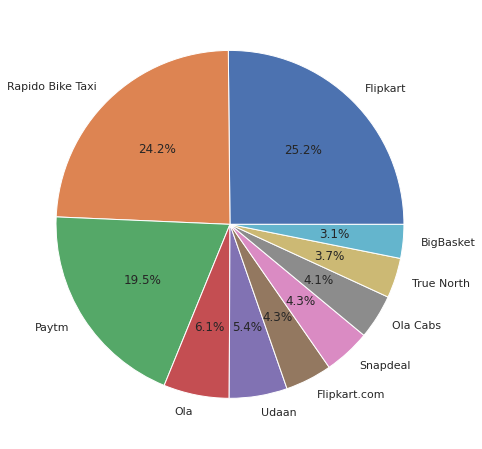

In [38]:
fig = plt.figure(figsize =(8, 8))
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0)
plt.pie(revenue, labels = startups['startup'], explode=explode,autopct='%1.1f%%');

In [39]:
## investor func to name undisclosed investors to others
def investor(x):
    x=x.strip()
    if x=='undisclosed' or x=='undisclosed investors' or x=='undisclosed investor':
        return 'others'
    else:
        return x
data["Investors Name"]=data["Investors Name"].apply(investor)

In [40]:
# getting the names of investors
names = data[data['Investors Name']!='others']["Investors Name"]

<h2> WordCloud representation of investors

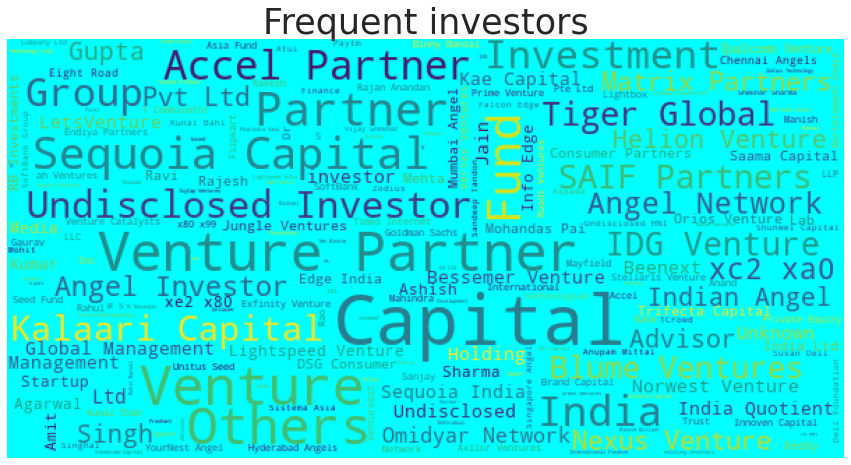

In [41]:
# creating the wordcloud to observe the most frequent investor
wordcloud = WordCloud(max_font_size=50, width=600, height=300, 
                      background_color='cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Frequent investors", fontsize=35)
plt.axis("off")
plt.show()

<h2> Famous industries/ sectors to invest

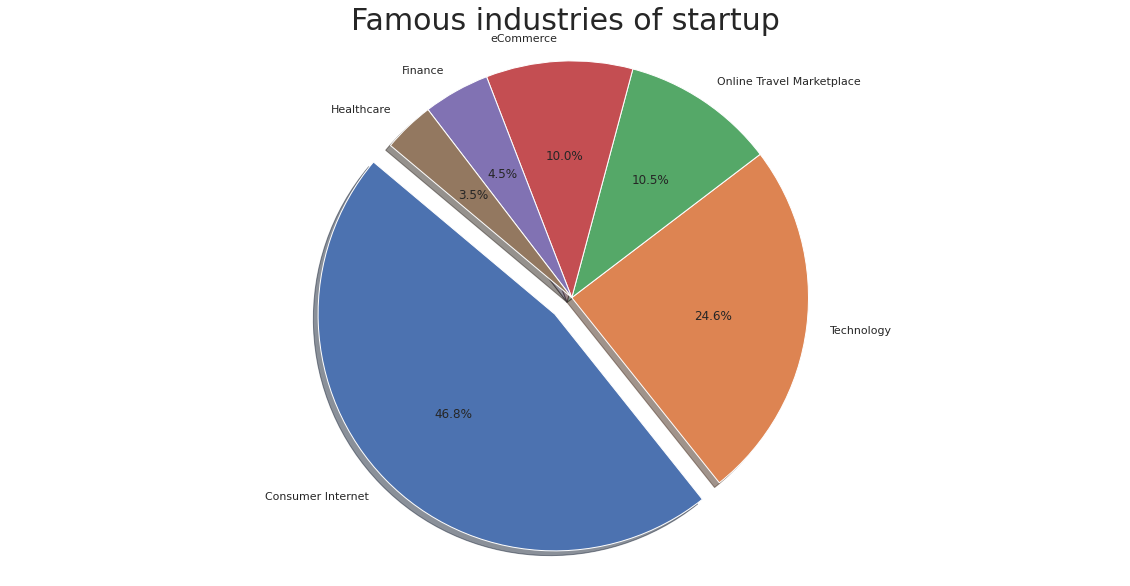

In [42]:
#in which sector there are most startups
d=data[data['Industry Vertical']!='others']['Industry Vertical'].value_counts().head(6)
explode = (0.1, 0, 0, 0,0,0)
fig1,ax1=plt.subplots(figsize=(20,10))

ax1.pie(d.values,explode=explode, labels=d.index,autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
plt.title("Famous industries of startup",fontsize=30)
plt.show()

In [43]:
### aggregate the revenue as per the startup name 
## get the list of all locations 
for i,row in data.iterrows():
    data.at[i,'Location']=list(set(data[data['Startup Name']==row['Startup Name']]['City  Location'].values))
    data.at[i,'Revenue']=float(np.sum(data[data['Startup Name']==row['Startup Name']]['Amount in USD'].values))
    # print(row['Startup Name'])

In [44]:
## remove the duplicate startups rows
data.drop_duplicates(subset='Startup Name',keep=False,ignore_index=True,inplace=True)

In [52]:
##convert location to the one-hot  encoding
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(data['Location']),columns=mlb.classes_,index=data['Location'].index)

In [55]:
data=pd.concat([data,res],axis=1)  ## concatinating both the dataframe

In [57]:
v = TfidfVectorizer(stop_words='english',analyzer='word',max_features=500) ## vector should create vector for 800 most weightage words
x = v.fit_transform(data['SubVertical'])

In [64]:
data.reset_index(drop=True,inplace=True) 

In [65]:
t=x.toarray()   # converting vector list to array
dt=pd.DataFrame(t)

In [66]:
df=pd.concat([data,dt],axis=1)   ## concatenating the tf-idf vectors with prevoius dataframe

In [67]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['Startup Name']=le.fit_transform(df['Startup Name'])
df['Industry Vertical']=le.fit_transform(df['Industry Vertical'])
df['InvestmentnType']=le.fit_transform(df['InvestmentnType'])


In [68]:
## drop the non-featured attributes
df.drop(labels=['Industry Vertical','SubVertical','Investors Name','Remarks',
                'Amount in USD','Location','City  Location'],inplace=True,axis=1)

In [69]:
df['Revenue']/=1000000

<h2> Ridge Linear Regression </h2>
it performs "L2 regularization (adds a factor of sum of squares of coeffiecient in the objective)".

In [70]:
model= Ridge(normalize=True,alpha=0.1) ## normalize the value for faster convergence while gradient descent
cv = RepeatedKFold(n_splits=20, n_repeats=3, random_state=32)   # k-fold cross validation with k=20
scores = cross_val_score(model,df.loc[:, df.columns != 'Revenue'],df['Revenue'], 
                         scoring='neg_median_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 14.562 (2.314)


<h2> Lasso Linear Regression </h2>
Lasso stands for "Least Absolute Shrinkage and selection Operator.

It performs "L1 regularization(adds a factor of sum of absolute value of coefficient in the optimization objective.

In [72]:
clf = linear_model.Lasso(alpha=0.1,normalize=True)
cv = RepeatedKFold(n_splits=20, n_repeats=3, random_state=32)
scores = cross_val_score(clf,df.loc[:, df.columns != 'Revenue'],df['Revenue'],
                         scoring='neg_median_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 7.987 (0.382)
